In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Bernoulli Distribution

$x\sim \text{bern}(p)$ where p is 0.5.

In [107]:
U = np.random.uniform(size=100)
p = 0.7


def Ber(U, p):
    bern_p = []
    for u in U:
        if u <= p:
            bern_p.append(1)
        else:
            bern_p.append(0)
    return bern_p


bern_p = Ber(U, p)

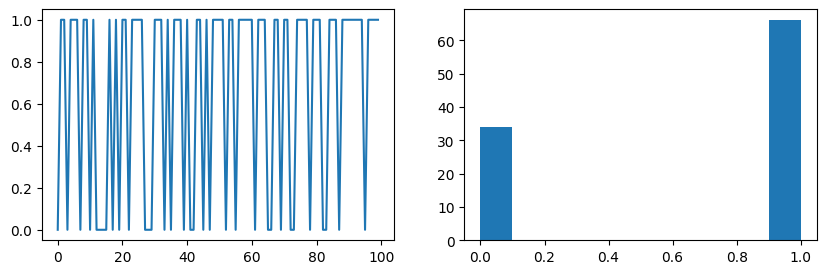

In [108]:
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
plt.plot(bern_p)
plt.subplot(1, 2, 2)
plt.hist(bern_p)
plt.show()

# Binomial distribution

$x\sim \text{bin}(n,p)$ where $n = 5$ and $ p = 0.6$

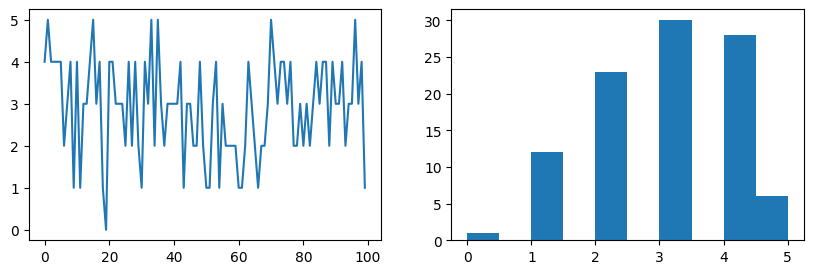

In [96]:
# numpy

Bin_np = np.random.binomial(n=5, p=0.6, size=100)
plt.subplot(1, 2, 1)
plt.plot(Bin_np)
plt.subplot(1, 2, 2)
plt.hist(Bin_np)
plt.show()

let $x_i\sim \text{bern}(p)$, 
then $$\sum_{i=1}^{5}x_i\sim \text{bin}(n,p)$$

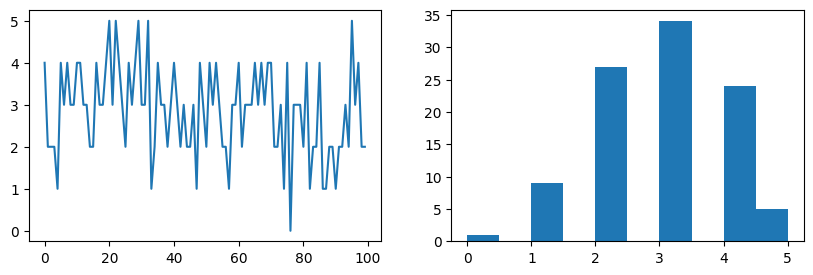

In [109]:
# manualy

P = 0.6
N = 5


def binomial(N, P):
    U = np.random.uniform(size=N)
    bernoulli = []
    for u in U:
        if u <= P:
            bernoulli.append(1)
        else:
            bernoulli.append(0)
    return sum(bernoulli)


Bin_man = []
for _ in range(100):
    Bin_man.append(binomial(N, P))

plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
plt.plot(Bin_man)
plt.subplot(1, 2, 2)
plt.hist(Bin_man)
plt.show()

# Poisson distribution

$x\sim \text{Poi}(\lambda)$